In [1]:
import numpy as np 
import pandas as pd 
import os


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import keras
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D



Using TensorFlow backend.


In [3]:
# Load the data
traindf = pd.read_csv("train.csv")
testdf = pd.read_csv("test.csv")

In [4]:
traindf.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
testdf.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
traindf.info()
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [7]:
traindf.shape,testdf.shape


((42000, 785), (28000, 784))

**Checking Null Values**

In [8]:
traindf.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [9]:
traindf.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

In [10]:
testdf.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

There is no missing values in train and test dataset

**Creating X_train and Y_train**

In [11]:
X_train=traindf.drop(labels=['label'],axis=1)
y_train=traindf['label']


In [12]:
X_train.shape,y_train.shape

((42000, 784), (42000,))

In [13]:
X = X_train.values
y = y_train.values

# **Normalisation**

In [14]:
# Normalize the data
X_train = X_train / 255.0
testdf = testdf / 255.0

In [15]:
# Reshape image in 3 dimensions 
X_train=X_train.values.reshape(X_train.shape[0], 28, 28, 1)
#testdf = testdf.values.reshape(testdf.shape[0],28,28,1)

# Plotting graph to check datasets

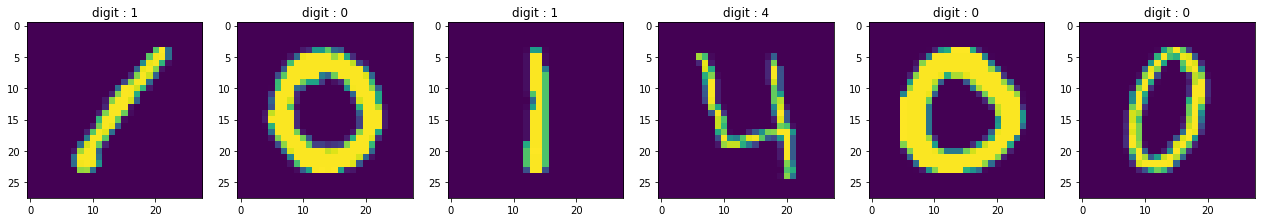

In [16]:
fig,ax=plt.subplots(1,6,figsize=(22,6))
#fig.tight_layout()

for i in range(6):
    ax[i].imshow(X[i].reshape(28,28))
    #ax[i].axis('off')
    ax[i].set_title('digit : {}'.format(y[i]))
plt.show()    

In [17]:

# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
y_train = to_categorical(y_train, num_classes = 10)


**plotting Grayscale(binary)images**

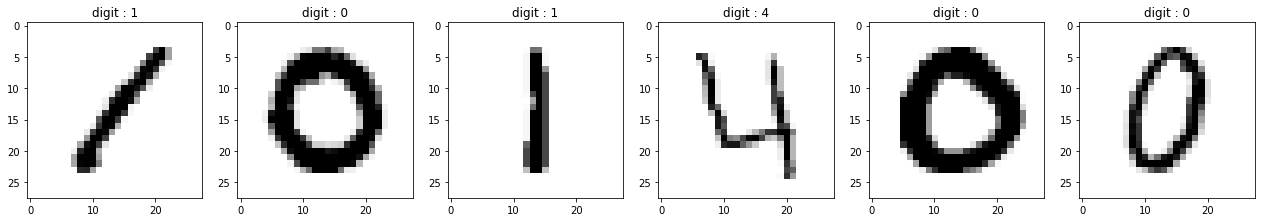

In [18]:
fig,ax=plt.subplots(1,6,figsize=(22,6))
#fig.tight_layout()

for i in range(6):
    ax[i].imshow(X[i].reshape(28,28),"binary")
    #ax[i].axis('off')
    ax[i].set_title('digit : {}'.format(y[i]))
plt.show()    

** Splitting Dataset into train and Validation sets for training**

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state=4)

In [20]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((37800, 28, 28, 1), (4200, 28, 28, 1), (37800, 10), (4200, 10))

# CNN Model

In [21]:
# model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

# summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)       

In [22]:
model.compile(loss='categorical_crossentropy',optimizer='sgd', metrics=['accuracy'])

In [23]:
history=model.fit(X_train, y_train,
          batch_size=16,
          epochs=20,
          verbose=1,
          validation_data=(X_val, y_val))


Train on 37800 samples, validate on 4200 samples
Epoch 1/20
37800/37800 [==============================] - 48s 1ms/step - loss: 0.5880 - accuracy: 0.8053 - val_loss: 0.1300 - val_accuracy: 0.9586
Epoch 2/20
37800/37800 [==============================] - 49s 1ms/step - loss: 0.1718 - accuracy: 0.9475 - val_loss: 0.0871 - val_accuracy: 0.9719
Epoch 3/20
37800/37800 [==============================] - 49s 1ms/step - loss: 0.1229 - accuracy: 0.9608 - val_loss: 0.0692 - val_accuracy: 0.9783
Epoch 4/20
37800/37800 [==============================] - 50s 1ms/step - loss: 0.1051 - accuracy: 0.9675 - val_loss: 0.0611 - val_accuracy: 0.9788
Epoch 5/20
37800/37800 [==============================] - 50s 1ms/step - loss: 0.0863 - accuracy: 0.9721 - val_loss: 0.0531 - val_accuracy: 0.9812
Epoch 6/20
37800/37800 [==============================] - 50s 1ms/step - loss: 0.0791 - accuracy: 0.9746 - val_loss: 0.0499 - val_accuracy: 0.9833
Epoch 7/20
37800/37800 [==============================] - 49s 1ms/ste

# Evaluate the model

Text(0.5, 0, 'epoch')

<Figure size 432x288 with 0 Axes>

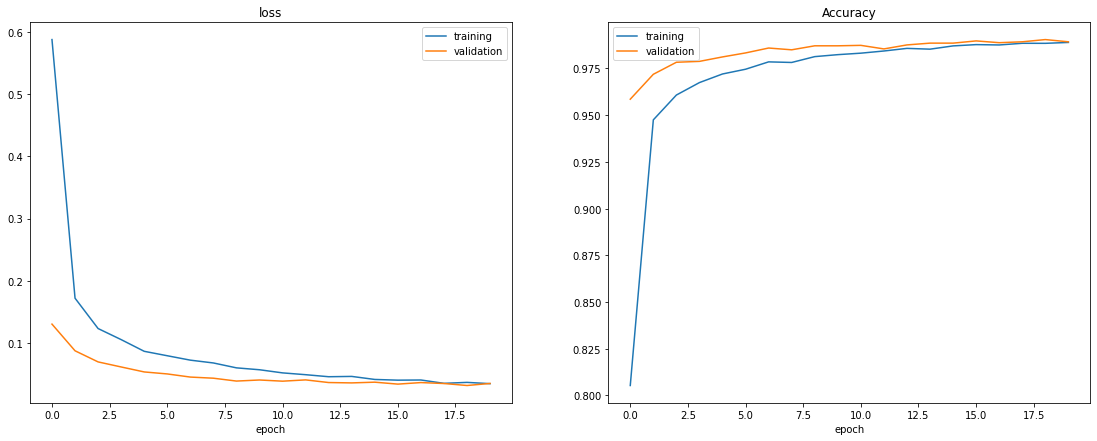

In [24]:
# Plot the graph for train and validation accuracy & loss

plt.figure()
fig,(ax1, ax2)=plt.subplots(1,2,figsize=(19,7))
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.legend(['training','validation'])
ax1.set_title('loss')
ax1.set_xlabel('epoch')

ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])
ax2.legend(['training','validation'])
ax2.set_title('Accuracy')
ax2.set_xlabel('epoch')

In [25]:
score =model.evaluate(X_val,y_val,verbose=0)
print('Val Score:',score[0])
print('Val Accuracy:',score[1])

Val Score: 0.034543859053547274
Val Accuracy: 0.9892857074737549


In [26]:
# Predict the values from the validation dataset
y_pred = model.predict(X_val)

In [27]:
# Convert predictions classes to one hot vectors 
y_pred_label = np.argmax(y_pred,axis = 1)

In [28]:
# Convert validation observations to one hot vectors
y_true = np.argmax(y_val,axis = 1) 

In [29]:
# Errors are difference between predicted labels and true labels
errors = (y_pred_label - y_true != 0)

In [30]:

y_pred_label_errors = y_pred_label[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
X_val_errors = X_val[errors]

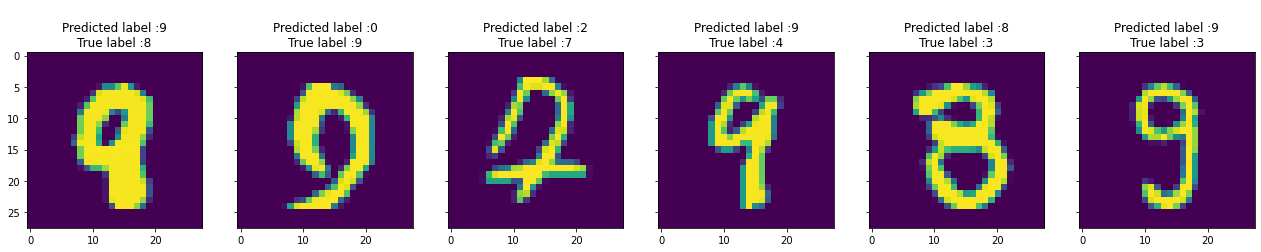

In [31]:
def show_errors(errors_idx,error_img,pred_errors, obsv_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    fig,ax=plt.subplots(1,6,figsize=(22,6),sharex=True,sharey=True)
    for i in range(6):
        error = errors_idx[n]
        ax[i].imshow((error_img[error]).reshape((28,28)))
        ax[i].set_title("\nPredicted label :{}\nTrue label :{}".format(pred_errors[error],obsv_errors[error]))
        n += 1    
    
# Probabilities of the wrong predicted numbers
y_pred_errors_prob = np.max(y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
diff_pred_true_errors = y_pred_errors_prob - true_prob_errors

# Sorted list of the difference prob errors
sorted_errors = np.argsort(diff_pred_true_errors)

# Top 6 errors 
important_errors = sorted_errors[-6:]

# Show the top 6 errors
show_errors(important_errors, X_val_errors, y_pred_label_errors, y_true_errors)

**## From the above graph we can seen that some label predicted as false...eg: True label 7 is predicted as 2, 4 as 9, 3 as 9, 4 as 2, 8 as 2, 3 as 2 **

In [32]:
testdf=testdf.values.reshape(testdf.shape[0], 28, 28, 1)

In [33]:
test_pred = pd.DataFrame(model.predict(testdf, batch_size=64))
test_pred = pd.DataFrame(test_pred.idxmax(axis = 1))
test_pred.index.name = 'ImageId'
test_pred = test_pred.rename(columns = {0: 'Label'}).reset_index()
test_pred['ImageId'] = test_pred['ImageId'] + 1

test_pred.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [34]:
# save results

test_pred.to_csv('digit_submission.csv', index = False)


This notebook gives a result of around 99%, with some randomness depending on weight initialization and test/train data split.